In [1]:
import pandas as pd
pd.set_option('max_colwidth',1)
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
data = pd.read_csv('D:/KULIAH CESSA/SKRIPSI/LAPORAN (Scrapping Instagram)/Data_kasus_perselingkuhan_instagram.csv')
data.index = data.index + 1
data

,NAMA,KOMENTAR
1,fairelyy,kaya bocah pacaran chattan nya🥲
2,aryantidede99,Sekarang udah klarifikasi ternyata beneran dong
3,mariachristina375,syahnazs tega benar sih kamu sebagai seorang wanita
4,sby_kota123,ah palingan Buat konten itu😂😂
5,yuniadza,anak smp aja kalah sama chat nya😂
...,...,...
1196,angyol__,"Dr jaman batu guru olahraga emg mata keranjang. Ga semua sih, ya 80% lah. Karna setiap ke jenjang sekolah lainya guru olahraga gua mata keranjang semua😂"
1197,ris.k.here,Gue malah kepikiran emaknya tu bocil ga kebayang mungkin dia nyari uang ampe gimana buat sekolahin anaknya eh dia malah begitu disekolahan😢
1198,adthrsss,Udah ga kaget si denger guru selingkuh sama siswi nya wkwk
1199,caalbisass,Gak aneh. Mantan aku juga gini selingkuh sama bu guru yang udah punya suami. Mana suaminya tni lagi kasian. Untung aku baik ga aduin wkwkwk


In [3]:
data = data[['KOMENTAR']]

In [4]:
data.shape

(1200, 1)

In [5]:
data.head(10)

,KOMENTAR
1,kaya bocah pacaran chattan nya🥲
2,Sekarang udah klarifikasi ternyata beneran dong
3,syahnazs tega benar sih kamu sebagai seorang wanita
4,ah palingan Buat konten itu😂😂
5,anak smp aja kalah sama chat nya😂
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢"
7,"Emang lagi musim nya 2023 ""Perceraian"""
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya.."
10,Fix ni cewe gatel ga tahan kayanya 😂


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syafi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syafi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\syafi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## CASE FOLDING ##

In [7]:
# Casefolding 
def text_prep(teks):
    teks = str(teks).lower()  
    teks = re.sub('@[\\w]+', '', teks)  
    teks = re.sub('[^a-zA-Z]', ' ', teks)  
    teks = re.sub(r"\b[a-zA-Z]\b", "", teks) 
    teks = re.sub(r'\s+', ' ', teks)  
    return teks

data['text_prep'] = data['KOMENTAR'].apply(text_prep)  
data.head(10)

,KOMENTAR,text_prep
1,kaya bocah pacaran chattan nya🥲,kaya bocah pacaran chattan nya
2,Sekarang udah klarifikasi ternyata beneran dong,sekarang udah klarifikasi ternyata beneran dong
3,syahnazs tega benar sih kamu sebagai seorang wanita,syahnazs tega benar sih kamu sebagai seorang wanita
4,ah palingan Buat konten itu😂😂,ah palingan buat konten itu
5,anak smp aja kalah sama chat nya😂,anak smp aja kalah sama chat nya
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢",hanya demi kepuasan kesenangan sensasi sesaat kalian korbankan perasaan pasangan dan anak anak
7,"Emang lagi musim nya 2023 ""Perceraian""",emang lagi musim nya perceraian
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??,kalau mau jujur sepertinya sudah tidur bareng ya
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya..",orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang org tersebut ga layak di contohi perilaku buruknya
10,Fix ni cewe gatel ga tahan kayanya 😂,fix ni cewe gatel ga tahan kayanya


## TOKENIZING ##

In [8]:
# Tokenizing
for i in range(len(data)):
    text = data.iloc[i]['text_prep']
    text = text.replace("'", "").replace(',', '').replace(']', '').replace('[', '')
    list_words = text.split()
    data.at[data.index[i], 'text_prep'] = list_words

data.head(10)


,KOMENTAR,text_prep
1,kaya bocah pacaran chattan nya🥲,"[kaya, bocah, pacaran, chattan, nya]"
2,Sekarang udah klarifikasi ternyata beneran dong,"[sekarang, udah, klarifikasi, ternyata, beneran, dong]"
3,syahnazs tega benar sih kamu sebagai seorang wanita,"[syahnazs, tega, benar, sih, kamu, sebagai, seorang, wanita]"
4,ah palingan Buat konten itu😂😂,"[ah, palingan, buat, konten, itu]"
5,anak smp aja kalah sama chat nya😂,"[anak, smp, aja, kalah, sama, chat, nya]"
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢","[hanya, demi, kepuasan, kesenangan, sensasi, sesaat, kalian, korbankan, perasaan, pasangan, dan, anak, anak]"
7,"Emang lagi musim nya 2023 ""Perceraian""","[emang, lagi, musim, nya, perceraian]"
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??,"[kalau, mau, jujur, sepertinya, sudah, tidur, bareng, ya]"
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya..","[orang, suka, selingkuh, tipe, orang, yg, tidak, setia, selain, karena, gatal, dan, suka, merusak, rumah, tangga, orang, org, tersebut, ga, layak, di, contohi, perilaku, buruknya]"
10,Fix ni cewe gatel ga tahan kayanya 😂,"[fix, ni, cewe, gatel, ga, tahan, kayanya]"


## NORMALISASI DATA ##

In [9]:
# Normalisasi
normalizad_word = pd.read_csv('D:/KULIAH CESSA/SKRIPSI/LAPORAN (Scrapping Instagram)/Text-normalization.csv')
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row.iloc[0] not in normalizad_word_dict:
        normalizad_word_dict[row.iloc[0]] = row.iloc[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['text_prep'] = data['text_prep'].apply(normalized_term)
data.head(10)


,KOMENTAR,text_prep
1,kaya bocah pacaran chattan nya🥲,"[kaya, bocah, pacaran, chattan, nya]"
2,Sekarang udah klarifikasi ternyata beneran dong,"[sekarang, sudah, klarifikasi, ternyata, beneran, dong]"
3,syahnazs tega benar sih kamu sebagai seorang wanita,"[syahnazs, tega, benar, sih, kamu, sebagai, seorang, wanita]"
4,ah palingan Buat konten itu😂😂,"[ah, palingan, buat, konten, itu]"
5,anak smp aja kalah sama chat nya😂,"[anak, smp, aja, kalah, sama, chat, nya]"
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢","[hanya, demi, kepuasan, kesenangan, sensasi, sesaat, kalian, korbankan, perasaan, pasangan, dan, anak, anak]"
7,"Emang lagi musim nya 2023 ""Perceraian""","[emang, lagi, musim, nya, perceraian]"
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??,"[kalau, mau, jujur, sepertinya, sudah, tidur, bareng, ya]"
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya..","[orang, suka, selingkuh, tipe, orang, yang, tidak, setia, selain, karena, gatal, dan, suka, merusak, rumah, tangga, orang, orang, tersebut, tidak, layak, di, contoh, perilaku, buruknya]"
10,Fix ni cewe gatel ga tahan kayanya 😂,"[fix, ini , cewe, gatel, tidak, tahan, kayanya]"


## LABELING MENGGUNAKAN KAMUS LEXICON BAHASA INDONESIA ##

In [10]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('D:/KULIAH CESSA/SKRIPSI/Kamus Lexicon/lexicon_positif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('D:/KULIAH CESSA/SKRIPSI/Kamus Lexicon/lexicon_negatif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity     
def lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    sentimen=''
    if (score >= 0):
        sentimen = 'positif'
    else:
        sentimen = 'negatif'
    return score, sentimen

In [11]:
results = data['text_prep'].apply(lexicon_indonesia)
results = list(zip(*results))
data['sentimen_skor'] = results[0]
data['sentimen'] = results[1]
print(data['sentimen'].value_counts())

sentimen
negatif    918
positif    282
Name: count, dtype: int64


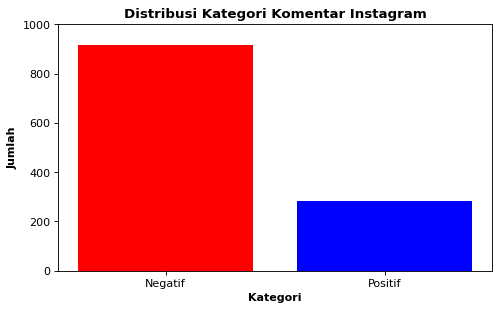

In [12]:
height = data['sentimen'].value_counts()
labels = ('Negatif', 'Positif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1000)
plt.title('Distribusi Kategori Komentar Instagram', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red', 'blue'])
plt.xticks(y_pos, labels)
plt.show()

In [13]:
data

,KOMENTAR,text_prep,sentimen_skor,sentimen
1,kaya bocah pacaran chattan nya🥲,"[kaya, bocah, pacaran, chattan, nya]",0,positif
2,Sekarang udah klarifikasi ternyata beneran dong,"[sekarang, sudah, klarifikasi, ternyata, beneran, dong]",4,positif
3,syahnazs tega benar sih kamu sebagai seorang wanita,"[syahnazs, tega, benar, sih, kamu, sebagai, seorang, wanita]",-10,negatif
4,ah palingan Buat konten itu😂😂,"[ah, palingan, buat, konten, itu]",-1,negatif
5,anak smp aja kalah sama chat nya😂,"[anak, smp, aja, kalah, sama, chat, nya]",2,positif
...,...,...,...,...
1196,"Dr jaman batu guru olahraga emg mata keranjang. Ga semua sih, ya 80% lah. Karna setiap ke jenjang sekolah lainya guru olahraga gua mata keranjang semua😂","[dari, jaman, batu, guru, olahraga, emang, mata, keranjang, tidak, semua, sih, ya, lah, karena, setiap, ke, jenjang, sekolah, lainya, guru, olahraga, gua, mata, keranjang, semua]",-14,negatif
1197,Gue malah kepikiran emaknya tu bocil ga kebayang mungkin dia nyari uang ampe gimana buat sekolahin anaknya eh dia malah begitu disekolahan😢,"[gua, malah, kepikiran, ibu nya, itu, bocil, tidak, kebayang, mungkin, dia, nyari, uang, ampe, bagaimana, buat, sekolahin, anaknya, eh, dia, malah, begitu, disekolahan]",-15,negatif
1198,Udah ga kaget si denger guru selingkuh sama siswi nya wkwk,"[sudah, tidak, kaget, si, denger, guru, selingkuh, sama, siswi, nya, wkwk]",-6,negatif
1199,Gak aneh. Mantan aku juga gini selingkuh sama bu guru yang udah punya suami. Mana suaminya tni lagi kasian. Untung aku baik ga aduin wkwkwk,"[tidak, aneh, mantan, aku, juga, gini, selingkuh, sama, bu, guru, yang, sudah, punya, suami, mana, suaminya, tni, lagi, kasian, untung, aku, baik, tidak, aduin, wkwkwk]",-10,negatif


## STOPWORD ##

In [14]:
#filtering-stopword
stop_words = set(stopwords.words("indonesian"))
ex_stopword = [ 'wahh', 'loh', 'nan', 'nya', 'ah', 'sii', 'si', 'eh', 'sih', 'mah', 'lho', 'ya', 'sih', 'gileeee', 'wey', 'ahh', 'sih', 'hahaha', 'huhuhu', 'bosss', 'broo', 'ckckckck', 'mmm', 'hehe', 'hahah', 'hadehh', 'husst', 'hahaa', 'duhhh']
def text_prep(teks):
    teks = [item for item in teks if item not in stopwords.words('indonesian')+ex_stopword]
    return teks
data['text_prep'] = data['text_prep'].apply(text_prep)
data.head(10)

,KOMENTAR,text_prep,sentimen_skor,sentimen
1,kaya bocah pacaran chattan nya🥲,"[kaya, bocah, pacaran, chattan]",0,positif
2,Sekarang udah klarifikasi ternyata beneran dong,"[klarifikasi, beneran]",4,positif
3,syahnazs tega benar sih kamu sebagai seorang wanita,"[syahnazs, tega, wanita]",-10,negatif
4,ah palingan Buat konten itu😂😂,"[palingan, konten]",-1,negatif
5,anak smp aja kalah sama chat nya😂,"[anak, smp, aja, kalah, chat]",2,positif
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢","[kepuasan, kesenangan, sensasi, korbankan, perasaan, pasangan, anak, anak]",-5,negatif
7,"Emang lagi musim nya 2023 ""Perceraian""","[emang, musim, perceraian]",-3,negatif
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??,"[jujur, tidur, bareng]",5,positif
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya..","[orang, suka, selingkuh, tipe, orang, setia, gatal, suka, merusak, rumah, tangga, orang, orang, layak, contoh, perilaku, buruknya]",-26,negatif
10,Fix ni cewe gatel ga tahan kayanya 😂,"[fix, ini , cewe, gatel, tahan, kayanya]",-11,negatif


## STEMMING ##

In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def text_prep(teks):
    teks = str(teks).lower()
    teks = stemmer.stem(teks)
    return teks
data['text_prep'] = data['text_prep'].apply(text_prep)
data.head(10)

,KOMENTAR,text_prep,sentimen_skor,sentimen
1,kaya bocah pacaran chattan nya🥲,kaya bocah pacar chattan,0,positif
2,Sekarang udah klarifikasi ternyata beneran dong,klarifikasi beneran,4,positif
3,syahnazs tega benar sih kamu sebagai seorang wanita,syahnazs tega wanita,-10,negatif
4,ah palingan Buat konten itu😂😂,paling konten,-1,negatif
5,anak smp aja kalah sama chat nya😂,anak smp aja kalah chat,2,positif
6,"Hanya demi kepuasan, kesenangan, ""sensasi"" sesaat kalian korbankan perasaan pasangan dan anak-anak 😢",puas senang sensasi korban asa pasang anak anak,-5,negatif
7,"Emang lagi musim nya 2023 ""Perceraian""",emang musim cerai,-3,negatif
8,Kalau mau jujur sepertinya sudah tidur bareng ya ??,jujur tidur bareng,5,positif
9,"Orang suka selingkuh tipe orang yg tidak setia selain karena gatal dan suka merusak rumah tangga orang, org tersebut ga layak di contohi perilaku buruknya..",orang suka selingkuh tipe orang setia gatal suka rusak rumah tangga orang orang layak contoh perilaku buruk,-26,negatif
10,Fix ni cewe gatel ga tahan kayanya 😂,fix ini cewe gatel tahan kaya,-11,negatif


In [16]:
# Pilih kolom yang diperlukan
data = data[['text_prep', 'sentimen']]

# Hapus duplikat
data = data.drop_duplicates()

# Reset indeks
data = data.reset_index(drop=True)

# Menampilkan hasil dengan indeks dimulai dari 1
data.index = data.index + 1

# Menampilkan shape data
print(data.shape)


(1188, 2)


In [17]:
data.to_csv('clean_data.csv')

## Word Cloud

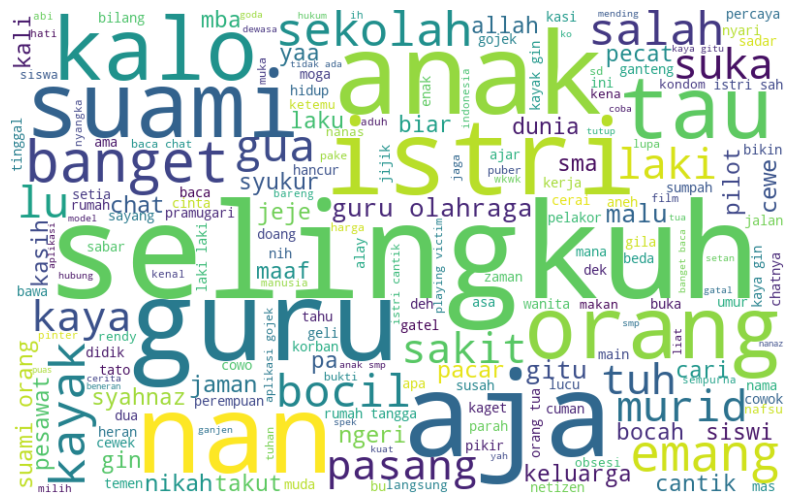

In [18]:
from wordcloud import WordCloud

# Menggabungkan semua kata dalam dokumen menjadi satu teks
all_text = ' '.join(data['text_prep'])

# Membuat WordCloud untuk seluruh kata dalam dokumen
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Jumlah teks dengan sentimen positif: 280
Jumlah teks dengan sentimen negatif: 908


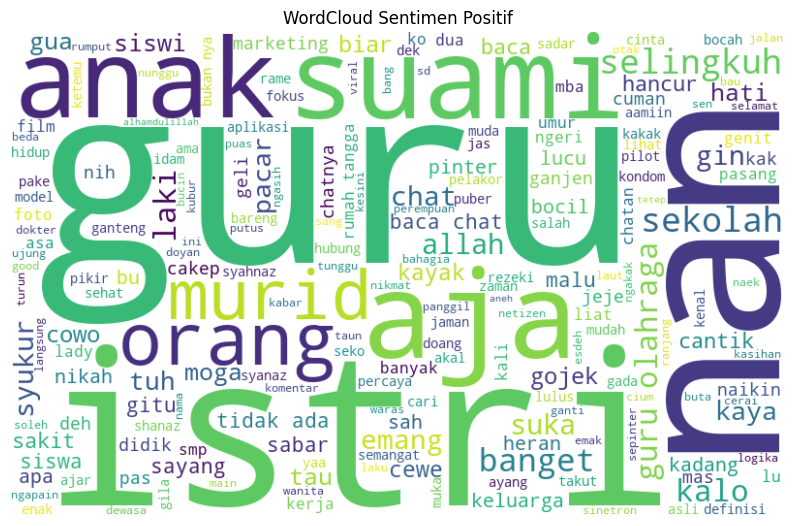

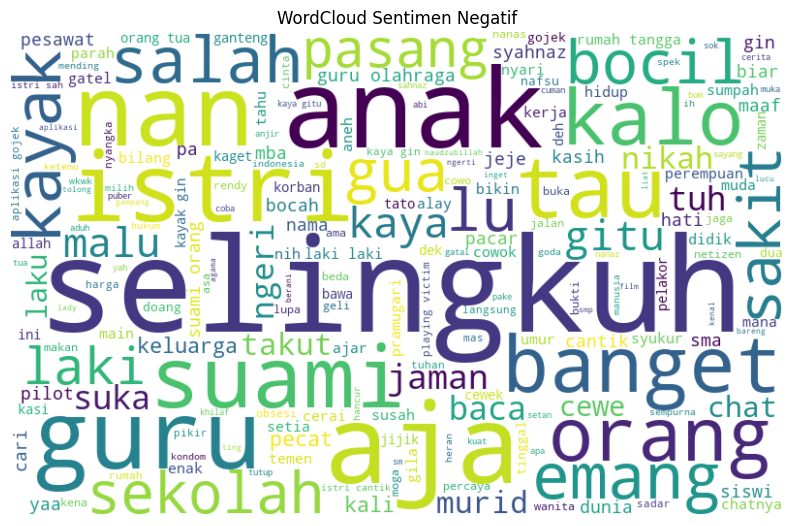

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat wordcloud dari teks dalam kelompok tertentu
def generate_wordcloud(teks, title):
    if teks and any(teks):  # Periksa apakah ada teks dan setidaknya ada satu teks yang tidak kosong
        all_text = ' '.join(teks)
        wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_text)
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("Tidak ada teks yang tersedia untuk membuat wordcloud.")


# Misalnya, Anda memiliki DataFrame 'data' dengan kolom 'text_prep' dan 'sentimen'
# Anda ingin membagi data berdasarkan sentimen
positive_text = data[data['sentimen'] == 'positif']['text_prep'].tolist()
negative_text = data[data['sentimen'] == 'negatif']['text_prep'].tolist()

# Pemecahan masalah: Cetak panjang teks untuk memeriksa apakah ada teks yang tersedia
print("Jumlah teks dengan sentimen positif:", len(positive_text))
print("Jumlah teks dengan sentimen negatif:", len(negative_text))

# Membuat wordcloud untuk teks dengan sentimen positif
generate_wordcloud(positive_text, 'WordCloud Sentimen Positif')

# Membuat wordcloud untuk teks dengan sentimen negatif
generate_wordcloud(negative_text, 'WordCloud Sentimen Negatif')

In [20]:
from collections import Counter

# Menggabungkan semua kata dalam dokumen menjadi satu teks
all_text = ' '.join(data['text_prep'])

# Memecah teks menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kemunculan setiap kata
word_freq = Counter(words)

# Mengambil 10 kata yang paling banyak muncul
top_words = word_freq.most_common(15)

# Menampilkan kata-kata yang paling banyak muncul
for word, freq in top_words:
    print("{:<15}: {:>5}".format(word, freq))


selingkuh      :   238
guru           :   220
anak           :   189
aja            :   184
istri          :   171
nan            :   161
suami          :   137
orang          :   135
banget         :   105
tau            :    96
laki           :    95
kalo           :    95
kayak          :    77
kaya           :    69
emang          :    67


In [21]:
from collections import Counter

# Memecah teks positif menjadi kata-kata
positive_words = ' '.join(positive_text).split()

# Menghitung frekuensi kemunculan setiap kata
positive_word_freq = Counter(positive_words)

# Mengambil 10 kata yang paling banyak muncul dalam sentimen positif
top_positive_words = positive_word_freq.most_common(10)

# Menampilkan kata-kata yang paling banyak muncul dalam sentimen positif
print("Kata-kata yang paling sering muncul dalam sentimen positif:")
for word, freq in top_positive_words:
    print("{:<15}: {:>5}".format(word, freq))

Kata-kata yang paling sering muncul dalam sentimen positif:
guru           :    75
istri          :    40
nan            :    38
aja            :    33
suami          :    29
anak           :    27
orang          :    25
murid          :    22
chat           :    21
selingkuh      :    21


In [22]:
# Memecah teks negatif menjadi kata-kata
negative_words = ' '.join(negative_text).split()

# Menghitung frekuensi kemunculan setiap kata
negative_word_freq = Counter(negative_words)

# Mengambil 10 kata yang paling banyak muncul dalam sentimen negatif
top_negative_words = negative_word_freq.most_common(10)

# Menampilkan kata-kata yang paling banyak muncul dalam sentimen negatif
print("\nKata-kata yang paling sering muncul dalam sentimen negatif:")
for word, freq in top_negative_words:
    print("{:<15}: {:>5}".format(word, freq))


Kata-kata yang paling sering muncul dalam sentimen negatif:
selingkuh      :   217
anak           :   162
aja            :   151
guru           :   145
istri          :   131
nan            :   123
orang          :   110
suami          :   108
banget         :    86
tau            :    85


## TF-IDF ##

In [23]:
#mengubah menjadi sentimen menjadi numerik ( 0 untuk negatif, 1 untuk positif )
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])
data.head(10)

,text_prep,sentimen
1,kaya bocah pacar chattan,1
2,klarifikasi beneran,1
3,syahnazs tega wanita,0
4,paling konten,0
5,anak smp aja kalah chat,1
6,puas senang sensasi korban asa pasang anak anak,0
7,emang musim cerai,0
8,jujur tidur bareng,1
9,orang suka selingkuh tipe orang setia gatal suka rusak rumah tangga orang orang layak contoh perilaku buruk,0
10,fix ini cewe gatel tahan kaya,0


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
import pandas as pd


max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(data["text_prep"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False, ngram_range=(min_gram, max_gram))
    tfs = tfidf.fit_transform(data["text_prep"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1, 1)

# Pilih sample indeks
idx_sample = 9

print("\nMenampilkan TFIDF sample ke-" + str(idx_sample), "\n")
print(data.loc[idx_sample, "text_prep"], "\n")

print("%20s" % "Term", "\t", "%-4s" % "TF", "\t", "%-4s" % "IDF", "\t", "%-6s" % "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample-1], idf_mat_unigram, tfidf_mat_unigram[idx_sample-1], terms_unigram)):
    if item[2] > 0:  # Only print terms that have a TF-IDF score greater than 0
        print ('%20s' % item[3], "\t", 
               "%.3f" % item[0], "\t", 
               "%.3f" % item[1], "\t", 
               "%.3f" % item[2])


Menampilkan TFIDF sample ke-9 

orang suka selingkuh tipe orang setia gatal suka rusak rumah tangga orang orang layak contoh perilaku buruk 

                Term 	 TF   	 IDF  	 TF-IDF

               buruk 	 0.067 	 6.471 	 0.431
              contoh 	 0.067 	 6.471 	 0.431
               gatal 	 0.067 	 6.134 	 0.409
               layak 	 0.067 	 6.694 	 0.446
               orang 	 0.267 	 3.389 	 0.904
               rumah 	 0.067 	 4.554 	 0.304
               rusak 	 0.067 	 6.471 	 0.431
           selingkuh 	 0.067 	 2.752 	 0.183
               setia 	 0.067 	 5.372 	 0.358
                suka 	 0.133 	 4.416 	 0.589
              tangga 	 0.067 	 4.945 	 0.330


In [25]:
#mengubah seluruh dokumen
cv = CountVectorizer()
tv = TfidfVectorizer()

count = cv.fit_transform(data["text_prep"])
tf_v = tv.fit_transform(data["text_prep"])

print(tf_v)

  (0, 356)	0.6704431397069062
  (0, 1554)	0.43183992755176803
  (0, 271)	0.4748597077632168
  (0, 962)	0.3721942118505636
  (1, 216)	0.6727056676499028
  (1, 1028)	0.7399101869225064
  (2, 2214)	0.515124880995466
  (2, 2056)	0.5957143828248938
  (2, 2018)	0.6162554105847371
  (3, 1052)	0.7410143194941442
  (3, 1567)	0.671489224265461
  (4, 350)	0.41425063524607597
  (4, 921)	0.6304447756491055
  (4, 27)	0.2880606962117067
  (4, 1955)	0.5056565831185122
  (4, 71)	0.3037568950689176
  (5, 1585)	0.28184017829465846
  (5, 107)	0.3367075142948741
  (5, 1055)	0.34517749520833757
  (5, 1875)	0.4428889010329613
  (5, 1870)	0.4428889010329613
  (5, 1682)	0.3732032268748196
  (5, 71)	0.3955563861850216
  (6, 340)	0.574472017175848
  (6, 1323)	0.696063865178245
  :	:
  (1185, 1940)	0.40922396151973167
  (1185, 914)	0.4368734791815831
  (1185, 2225)	0.4783242210194827
  (1185, 431)	0.5446870697718678
  (1185, 1857)	0.23130610793634473
  (1186, 20)	0.37237069351920943
  (1186, 2114)	0.3723706935192

In [26]:
# Simpan vectorizer dalam bentuk pickle
import pickle

# Anggap vectorizer sudah didefinisikan sebelumnya
with open("vectorizer_tfidf.pkl", "wb") as f:
    pickle.dump(tv, f)

## SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
#X yang ditetapkan merupakan atribut yang mempengaruhi sentimen
#Y merupakan sentimen itu sendiri
x = tf_v
y = data['sentimen']

In [28]:
sm = SMOTE(random_state=42)
X_sampling, Y_sampling = sm.fit_resample(x, y)

In [29]:

print(X_sampling.shape)
print(Y_sampling.shape)

(1816, 2263)
(1816,)


<function matplotlib.pyplot.show(close=None, block=None)>

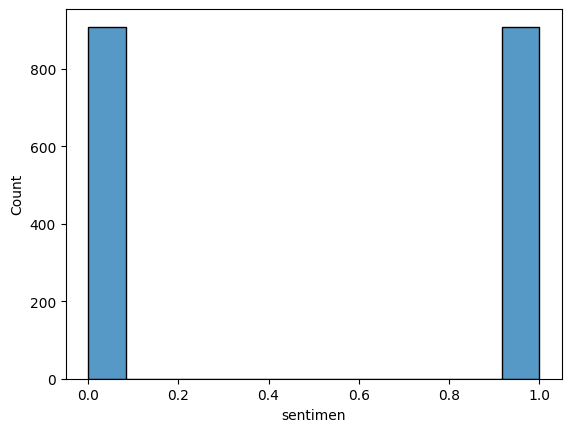

In [30]:
sns.histplot(data=Y_sampling)
plt.show

## SPLIT DATA ##

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sampling,Y_sampling, test_size=0.20, random_state = 42)
X_test.shape

(364, 2263)

In [32]:
# Menggabungkan X_train dan Y_train untuk disimpan
train_data = pd.DataFrame({'komentar': X_train, 'sentimen': Y_train})
train_data.to_csv('train_data.csv', index=False)

# Menggabungkan X_test dan Y_test untuk disimpan
test_data = pd.DataFrame({'komentar': X_test, 'sentimen': Y_test})
test_data.to_csv('test_data.csv', index=False)

## NAIVE BAYES ##

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)
naive_bayes_pred = nb_classifier.predict(X_test)

In [34]:
nb_classifier

MultinomialNB()

In [35]:
print('Akurasi Model    : ', accuracy_score(naive_bayes_pred, Y_test))

Akurasi Model    :  0.8626373626373627


In [36]:
print(classification_report(Y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       173
           1       0.82      0.94      0.88       191

    accuracy                           0.86       364
   macro avg       0.87      0.86      0.86       364
weighted avg       0.87      0.86      0.86       364



In [37]:
conma = confusion_matrix(Y_test, naive_bayes_pred)
print('Confusion Matrix:\n', conma)

Confusion Matrix:
 [[135  38]
 [ 12 179]]


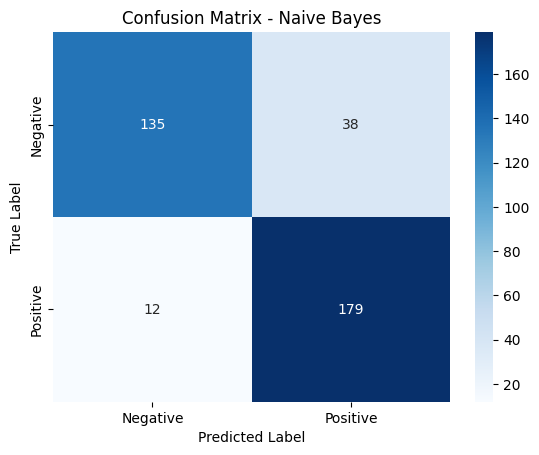

In [38]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Naive Bayes')
    plt.show()

# Labels for confusion matrix
labels = ['Negative', 'Positive']

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(conma, labels)


## SVM (Support Vector Machine) ##

In [39]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear',  C = (10.0) , random_state = 42)
svm_classifier.fit(X_train, Y_train)
svm_pred = svm_classifier.predict(X_test)

In [40]:
svm_classifier

SVC(C=10.0, kernel='linear', random_state=42)

In [41]:
print('Akurasi Model    : ', accuracy_score(svm_pred, Y_test))

Akurasi Model    :  0.9065934065934066


In [42]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       173
           1       0.87      0.96      0.92       191

    accuracy                           0.91       364
   macro avg       0.91      0.90      0.91       364
weighted avg       0.91      0.91      0.91       364



In [43]:
conma2 = confusion_matrix(Y_test, svm_pred)
print('Confusion Matrix:\n', conma2)

Confusion Matrix:
 [[146  27]
 [  7 184]]


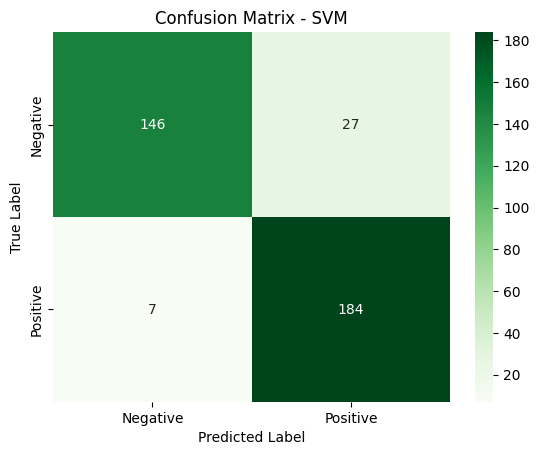

In [44]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - SVM')
    plt.show()

# Labels for confusion matrix
labels = ['Negative', 'Positive']

# Plot confusion matrix for SVM
plot_confusion_matrix(conma2, labels)


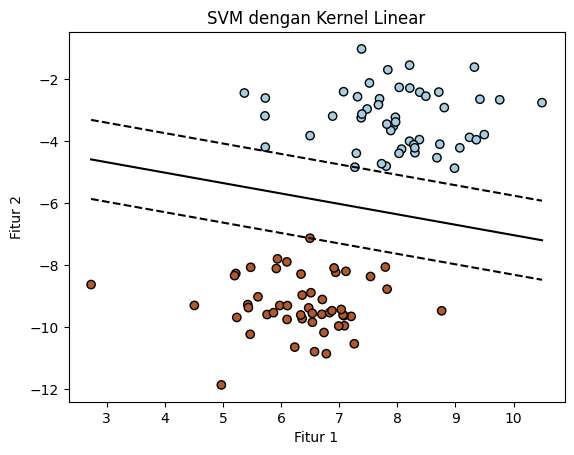

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Menghasilkan data contoh
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Melatih model SVM dengan kernel linear
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Menghitung hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (model.intercept_[0]) / w[1]

# Menghitung margin
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('SVM dengan Kernel Linear')
plt.show()

In [46]:
# Simpan model dalam bentuk pickle
with open("model_svc.pkl", "wb") as f:
    pickle.dump(svm_classifier, f)